## **텍스트마이닝(윤상혁 교수)**
## ch3. 토픽모델링
## ch3_01. LDA토픽모델링


---

In [1]:
# konlpy 패키지 설치: 한국어 형태소 분석을 위한 라이브러리입니다.
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 29.2 MB/s eta 0:00:00


In [10]:
# pandas 라이브러리를 pd라는 이름으로 임포트: 데이터 처리를 위한 주요 라이브러리입니다.
import pandas as pd

# konlpy 라이브러리에서 Okt 형태소 분석기를 임포트: 한국어 텍스트를 형태소 단위로 분석합니다.
from konlpy.tag import Okt

# 엑셀 파일을 데이터프레임 형태로 불러오기: 분석할 뉴스 데이터를 불러옵니다.
# df = pd.read_csv('blind_topic_realestate.csv')
df = pd.read_csv('blind_topic_realestate_final.csv')


In [11]:
df.head(2)

,Unnamed: 0.1,Unnamed: 0,title,link,pre_text,firm,id,date,article_doc,body,like_cnt,comment_cnt,comment_map
0,0,0,강남 입주 단지들 전세가격은 하락하겠죠?,https://www.teamblind.com/kr/post/%EA%B0%95%EB...,전세가격 15억 정도 하는 단지들은 대부분 전세자금대출 받아 들어가는데 신규입주 전...,퀄컴코리아,t****,2025-07-02,"{'title': '강남 입주 단지들 전세가격은 하락하겠죠?', 'body': '전...",전세가격 15억 정도 하는 단지들은\n대부분 전세자금대출 받아 들어가는데\n신규입주...,좋아요,3,"[{'firm': 'LG전자\n', 'id': ' z*****', 'contents..."
1,1,1,자본주의 불평등의 원인과 해결 - 보유세 (feat. 진보와 빈곤),https://www.teamblind.com/kr/post/%EC%9E%90%EB...,아래 내용은 1879년에 발행된 미국 정치경제학자 헨리 조지의 ‘진보와 빈곤’ 중 ...,신한투자증권,i*******,2025-07-02,{'title': '자본주의 불평등의 원인과 해결 - 보유세 (feat. 진보와 빈...,아래 내용은 1879년에 발행된 미국 정치경제학자 헨리 조지의 ‘진보와 빈곤’ 중 ...,2,8,"[{'firm': '현대자동차\n', 'id': ' l*******', 'conte..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3794 entries, 0 to 3793
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  3794 non-null   int64 
 1   Unnamed: 0    3794 non-null   int64 
 2   title         3794 non-null   object
 3   link          3788 non-null   object
 4   pre_text      3794 non-null   object
 5   firm          3794 non-null   object
 6   id            3794 non-null   object
 7   date          3794 non-null   object
 8   article_doc   2606 non-null   object
 9   body          2490 non-null   object
 10  like_cnt      2490 non-null   object
 11  comment_cnt   2490 non-null   object
 12  comment_map   2490 non-null   object
dtypes: int64(2), object(11)
memory usage: 385.5+ KB


In [16]:
df=df.iloc[:,2:]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3794 entries, 0 to 3793
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        3794 non-null   object
 1   link         3788 non-null   object
 2   pre_text     3794 non-null   object
 3   firm         3794 non-null   object
 4   id           3794 non-null   object
 5   date         3794 non-null   object
 6   article_doc  2606 non-null   object
 7   body         2490 non-null   object
 8   like_cnt     2490 non-null   object
 9   comment_cnt  2490 non-null   object
 10  comment_map  2490 non-null   object
dtypes: object(11)
memory usage: 326.2+ KB


In [18]:
# '제목'과 '본문' 컬럼을 합쳐 '제목_본문'이라는 새로운 컬럼을 생성합니다.
df['제목_본문']=df['title'].fillna(' ')+' '+ df['body'].fillna(' ')

In [19]:
df['제목_본문']

,제목_본문
0,강남 입주 단지들 전세가격은 하락하겠죠? 전세가격 15억 정도 하는 단지들은\n대부...
1,자본주의 불평등의 원인과 해결 - 보유세 (feat. 진보와 빈곤) 아래 내용은 1...
2,DSR 40% 맞추려고 40년50년 이렇게 받는게 건강한건가..
3,6억대출 제한은 공급대책 이라고 ㅋㅋㅋ
4,주담대 약정 체결 후 실행 주담대 전자약정했고 현장조사 할 수 있다고 전화왔는데\n...
...,...
3789,오티에르 성수 20평대 청약 하려면... 대출 규제 때문에 현금 15억은 들고 있어...
3790,지금 가장 쫄리는 곳 수지 광명 인덕원
3791,이번 규제 별다를게 없다
3792,아무리 규제 때리고 발광해도 부동산 수요는 절대 막을 수 없다 얼마나 집값 치솟는가 봐라


In [20]:
# Okt 형태소 분석기 객체를 생성합니다. 한국어 텍스트 분석을 위한 준비 단계입니다.
okt = Okt()

# 텍스트 데이터를 형태소 단위로 분석하여 특정 품사(명사, 형용사, 동사)만 추출하는 함수입니다.
def tokenizer(txt) :
    morph=okt.pos(txt)
    words=[]
    for word, tag in morph :
#        if tag in ['Noun', 'Adjective', 'Verb'] : # 명사, 동사, 형용사만 가져오도록
        if tag in ['Noun'] : # 명사만 가져오도록
            if len(word) > 1 :
                words.append(word)

    return words

In [ ]:
text='나는 어제 영어 공부를 열심해 했다'

In [ ]:
okt = Okt()
okt.pos(text)

[('나', 'Noun'),
 ('는', 'Josa'),
 ('어제', 'Noun'),
 ('영어', 'Noun'),
 ('공부', 'Noun'),
 ('를', 'Josa'),
 ('열', 'Modifier'),
 ('심해', 'Noun'),
 ('했다', 'Verb')]

In [21]:
# 데이터프레임의 모든 데이터를 문자열 타입으로 변환합니다. 이는 형태소 분석을 위한 준비 단계입니다.
df = df.astype('str')

#'제목_본문' 컬럼에 tokenizer 함수를 적용하여, 형태소 분석을 수행하고 결과를 다시 해당 컬럼에 저장합니다.
df['제목_본문']=df['제목_본문'].apply(tokenizer)

# 데이터프레임의 모든 열을 문자열 타입으로 변환합니다. 안전한 파일 저장을 위한 단계입니다.
df=df.astype('str')

# 데이터프레임을 '정제파일.csv'로 저장합니다. 분석 결과를 파일로 저장하는 단계입니다.
df.to_csv('process.csv', encoding='utf8')

In [22]:
df['제목_본문']

,제목_본문
0,"['강남', '단지', '가격', '하락', '전세', '가격', '정도', '단지..."
1,"['자본주의', '불평등', '원인', '해결', '유세', '진보', '빈곤', ..."
2,['건가']
3,"['제한', '공급', '대책']"
4,"['담대', '약정', '체결', '실행', '담대', '전자', '약정', '현장..."
...,...
3789,"['에르', '성수', '청약', '대출', '규제', '때문', '현금', '여기..."
3790,"['지금', '가장', '쫄리', '수지', '광명', '인덕원']"
3791,"['이번', '규제']"
3792,"['규제', '부동산', '수요', '절대', '얼마나', '집값']"


# 빈도분석 및 워드크라우드 시각화

In [33]:
from sklearn.feature_extraction.text import CountVectorizer  # CountVectorizer 임포트
df = pd.read_csv('process.csv', encoding='utf-8')
#불용어를 처리합니다.
stop_words=['부동산', '집값','주택', '대출', '규제', '사람', '그냥', '생각','이제', '이번', '지금', '건가']

###최대개수설정
cv = CountVectorizer(ngram_range=(1,1), max_features=3000, stop_words=stop_words)

# CountVectorizer를 사용하여 '제목_본문' 컬럼의 텍스트 데이터를 문서-단어 행렬로 변환합니다.
tdm = cv.fit_transform(df['제목_본문'])

# 단어와 그 빈도수를 담은 데이터프레임을 생성합니다. 이는 단어 사용 빈도 분석을 위한 단계입니다.
word_count_tf = pd.DataFrame({'단어': cv.get_feature_names_out(), '빈도': tdm.sum(axis=0).flat})

# 단어 빈도수를 기준으로 내림차순으로 정렬합니다. 이는 가장 자주 사용된 단어를 확인하기 위한 단계입니다.
word_count_tf= word_count_tf.sort_values('빈도',ascending=False)

# 단어 빈도수를 'word_count.xlsx' 엑셀 파일로 저장합니다. 결과를 저장하는 단계입니다.
word_count_tf.to_excel('word_count.xlsx')

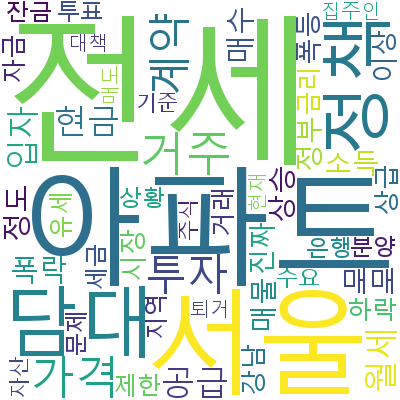

In [34]:
# WordCloud 라이브러리를 임포트합니다: 텍스트 데이터의 빈도수를 시각화하기 위한 도구입니다.
from wordcloud import WordCloud

# 한글 폰트 경로를 지정합니다. WordCloud에서 한글을 정상적으로 표시하기 위한 준비 단계입니다.
font_path = 'malgun.ttf'

# WordCloud 객체를 생성합니다. 여기서는 배경색을 흰색으로, 최대 단어 수를 50개로 설정합니다.
wc = WordCloud(background_color='white', max_words=50, font_path=font_path,width=400, height=400)

# 단어 빈도 사전을 생성합니다. 이는 WordCloud 생성에 사용될 데이터입니다.
count_dic = dict(zip(word_count_tf['단어'], word_count_tf['빈도']))

# WordCloud를 이용해 단어 빈도를 시각화합니다. 이는 가장 많이 사용된 단어를 시각적으로 확인하기 위한 단계입니다.
cloud = wc.fit_words(count_dic)
cloud.to_file('word_cloud.png')
cloud.to_image()

# TF-IDF 및 워드크라우드 시각화

In [35]:
# TfidfTransformer를 임포트합니다: TF-IDF 값을 계산하기 위한 도구입니다.
from sklearn.feature_extraction.text import TfidfTransformer

# TfidfTransformer 객체를 생성합니다. 이는 문서-단어 행렬의 단어 빈도수를 TF-IDF 값으로 변환하기 위한 준비 단계입니다.
trans= TfidfTransformer()

# 문서-단어 행렬에 대해 TF-IDF 변환을 수행합니다. 이는 각 단어의 중요도를 수치화하는 단계입니다.
dtm2 = trans.fit_transform(tdm)

# 단어와 그 TF-IDF 값을 담은 데이터프레임을 생성합니다. 이는 단어의 중요도 분석을 위한 단계입니다.
df2 = pd.DataFrame({'단어': cv.get_feature_names_out(), 'tf-idf': tdm.sum(axis=0).flat})

# TF-IDF 값을 기준으로 내림차순으로 정렬합니다. 이는 중요한 단어를 확인하기 위한 단계입니다.
df2 = df2.sort_values('tf-idf',ascending=False)

# 인덱스를 재설정합니다. 이는 데이터의 가독성을 높이기 위한 단계입니다.
df2=df2.reset_index(drop=True)
df2.index=df2.index+1

# TF-IDF 값을 'tf_idf.csv' 파일로 저장합니다. 결과를 저장하는 단계입니다. 인코딩을 cp949로 설정하여 한글이 깨지지 않게 합니다.
df2.to_csv('tf_idf.csv', encoding='cp949')

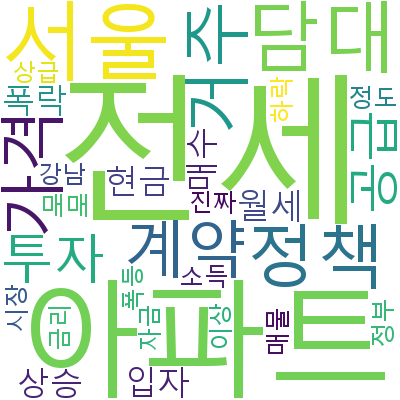

In [36]:
from wordcloud import WordCloud  # WordCloud 임포트

# 한글 폰트 경로 지정
font_path = 'malgun.ttf'

# WordCloud 객체를 다시 생성합니다. 이번에는 TF-IDF 값을 기반으로 가장 중요한 단어를 시각화합니다.
wc = WordCloud(background_color='white', max_words=30, font_path=font_path,width=400, height=400)

# TF-IDF 값을 기반으로 단어 빈도 사전을 생성합니다.
count_dic = dict(zip(df2['단어'], df2['tf-idf']))

# WordCloud를 이용해 TF-IDF 값을 시각화합니다. 이는 중요한 단어를 시각적으로 확인하기 위한 단계입니다.
cloud = wc.fit_words(count_dic)
cloud.to_image()

# LDA분석

In [37]:
!pip install pyldavis

In [38]:
# LDA 분석을 위한 라이브러리 임포트
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
import pyLDAvis
import pandas as pd

In [39]:
# CSV 파일에서 데이터 불러오기
data = pd.read_csv('process.csv', encoding='utf-8')
data = data.astype('str')
data=data['제목_본문']

In [40]:
data

,제목_본문
0,"['강남', '단지', '가격', '하락', '전세', '가격', '정도', '단지..."
1,"['자본주의', '불평등', '원인', '해결', '유세', '진보', '빈곤', ..."
2,['건가']
3,"['제한', '공급', '대책']"
4,"['담대', '약정', '체결', '실행', '담대', '전자', '약정', '현장..."
...,...
3789,"['에르', '성수', '청약', '대출', '규제', '때문', '현금', '여기..."
3790,"['지금', '가장', '쫄리', '수지', '광명', '인덕원']"
3791,"['이번', '규제']"
3792,"['규제', '부동산', '수요', '절대', '얼마나', '집값']"


In [107]:
# 'data' 리스트에 저장된 텍스트 데이터(예: '제목_본문')를 공백 기준으로 분할하여 토큰 리스트를 생성합니다.
token = [keywords.split() for keywords in data]
# 토큰 리스트를 기반으로 Gensim의 Dictionary 객체를 생성합니다. 이 객체는 각 토큰에 고유한 ID를 매핑합니다.
# 결과적으로, 텍스트 데이터의 모든 유니크한 단어가 ID와 함께 딕셔너리로 관리됩니다.
id2word = corpora.Dictionary(token)

# 딕셔너리에서 빈도수 기반으로 단어를 필터링합니다. no_below와 no_above 파라미터를 사용하여,
# 너무 드물게 나타나는 단어(no_below 이하)와 너무 자주 나타나는 단어(no_above 이상)를 제거합니다.
# no_below=3는 각 단어가 최소 3개의 문서에 나타나야 함을 의미합니다.
# no_above=0.1는 전체 문서의 10% 미만에만 나타나는 단어를 유지함을 의미합니다.
id2word.filter_extremes(no_below=5, no_above=0.1)

# 최종적으로, 각 문서를 (단어 ID, 단어 빈도) 튜플의 리스트로 변환하는 문서-단어 빈도 매트릭스(corpus)를 생성합니다.
# 이 과정에서 각 문서 내에 있는 단어들이 얼마나 자주 나타나는지를 기록합니다.
# 이 corpus는 텍스트 데이터를 기반으로 한 다양한 모델링 작업(예: LDA 주제 모델링)에 사용될 수 있습니다.
corpus= [id2word.doc2bow(text) for text in token]
corpus

[[(0, 2),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 2),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1)],
 [(0, 3),
  (5, 5),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 3),
  (19, 1),
  (20, 2),
  (21, 1),
  (22, 2),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 2),
  (31, 4),
  (32, 3),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 6),
  (39, 1),
  (40, 3),
  (41, 2),
  (42, 6),
  (43, 1),
  (44, 2),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 2),
  (50, 17),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 4),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 2),
  (64, 3),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 3),
  (72, 2),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 2),
  (77, 2),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 4),
  (87, 1),
  (88, 7),
  (89, 2)

In [108]:
# numpy 라이브러리를 np라는 이름으로 가져옵니다. numpy는 다양한 수학적 연산을 위해 사용됩니다.
import numpy as np

perplexity_values = []

# 토픽의 수를 3에서 9까지 변화시키면서 LDA 모델의 퍼플렉시티를 계산합니다.
# 토픽 수가 변할 때마다 모델의 성능을 퍼플렉시티를 통해 평가합니다.
for i in range(3, 20):
    # LDA 모델을 생성합니다. 'num_topics=i'는 토픽의 수를 i로 설정합니다.
    # 'id2word'는 단어의 인덱스 매핑을 나타내는 사전입니다.
    # 'random_state=100'는 모델 결과의 재현 가능성을 위해 난수 생성기의 시드를 설정합니다.
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=id2word, random_state=100)

    # 모델의 로그 퍼플렉시티를 계산하고, 이를 자연로그의 밑인 e를 기반으로 하는 지수 함수로 변환하여
    # 퍼플렉시티를 계산합니다. 퍼플렉시티 값이 낮을수록 모델이 데이터를 더 잘 설명하고 있다는 의미입니다.
    perplexity = np.exp(ldamodel.log_perplexity(corpus))

    # 계산된 퍼플렉시티를 리스트에 추가합니다.
    perplexity_values.append(perplexity)

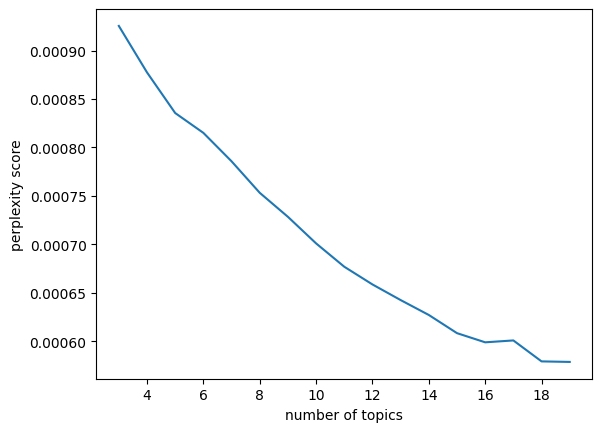

In [109]:
# Perplexity 그래프 시각화
import matplotlib.pyplot as plt

x = range(3, 20)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexity score")
plt.show()

In [110]:
from gensim.models import CoherenceModel  # CoherenceModel 임포트

coherence_values = []
# 다양한 토픽 수에 대해 Coherence 계산
for i in range(3, 20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=id2word,random_state=100)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=token, dictionary=id2word, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

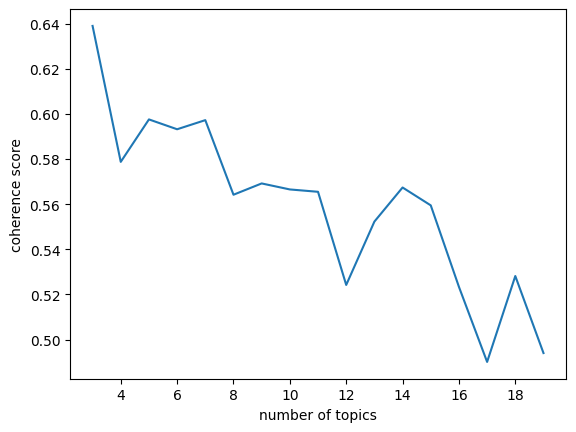

In [111]:
x = range(3, 20)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [124]:
k=7 ###적정토픽수 입력 coherence를 최대로 하고 perpelxity를 최소로 하는 적절합 토픽수

In [125]:
#적정토픽에 해당 되는 단어를 구하기!
from gensim import corpora, models
# 적절한 토픽 수를 설정하여 LDA 모델 훈련
model = LdaModel(corpus=corpus, num_topics=k, id2word=id2word, passes=15, random_state=100)
# num_topic에 적절 토픽 수 설정
topics=model.print_topics(num_words=15)
 ####토픽당 단어수설정


In [126]:
topics

[(0,
  '0.015*"\'계약\'," + 0.015*"\'아파트\'," + 0.012*"\'재건축\'," + 0.011*"\'단지\'," + 0.011*"\'임대\'," + 0.010*"\'이후\'," + 0.010*"\'공급\'," + 0.010*"\'매물\'," + 0.009*"\'시장\'," + 0.009*"\'임차\'," + 0.008*"\'갱신\'," + 0.008*"\'추가\'," + 0.008*"\'분양\'," + 0.008*"\'임대차\'," + 0.008*"\'거주\',"'),
 (1,
  '0.027*"\'계약\'," + 0.020*"\'은행\'," + 0.019*"\'잔금\'," + 0.017*"\'담대\'," + 0.015*"\'자금\'," + 0.015*"[\'대출\'," + 0.014*"\'적용\'," + 0.013*"\'주택\'," + 0.013*"\'신청\'," + 0.011*"[\'담대\'," + 0.011*"\'대출\']" + 0.011*"\'계약서\'," + 0.010*"\'퇴거\'," + 0.010*"\'한도\'," + 0.010*"\'금융\',"'),
 (2,
  '0.028*"\'소득\'," + 0.014*"\'정도\'," + 0.014*"\'집값\'," + 0.014*"\'신용\'," + 0.013*"\'사람\'," + 0.012*"\'아파트\'," + 0.012*"\'연봉\'," + 0.010*"\'생각\'," + 0.010*"\'부부\'," + 0.010*"\'기준\'," + 0.009*"\'담대\'," + 0.008*"\'고민\'," + 0.008*"\'이자\'," + 0.008*"\'신생아\'," + 0.008*"\'강남\',"'),
 (3,
  '0.040*"\'주택\'," + 0.023*"\'입자\'," + 0.022*"\'사람\'," + 0.020*"\'거주\'," + 0.018*"\'현금\'," + 0.018*"\'매수\'," + 0.017*"\'담대\'," + 0.015*"\'지금\'," + 0.0

In [127]:
# 도출된 토픽을 CSV 파일로 저장
TOPIC={'topics':topics}
TOPIC=pd.DataFrame(TOPIC)
TOPIC.to_csv('lda_result.csv',encoding='utf-8')

In [128]:
!pip install pyldavis

In [129]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook() # Jupyter Notebook에서 pyLDAvis 시각화를 사용할 수 있도록 설정
# pyLDAvis를 이용해 LDA 모델 시각화
vis = pyLDAvis.gensim.prepare(model, corpus, id2word)
vis  # 시각화 객체 출력

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.167130 -0.034208       1        1  21.774704
3      0.064610 -0.028034       2        1  18.473123
1      0.265681 -0.006687       3        1  13.077235
4     -0.166388 -0.177642       4        1  12.993351
0      0.133910 -0.066939       5        1  12.319372
6     -0.047734  0.093202       6        1  10.715175
2     -0.082948  0.220308       7        1  10.647040, topic_info=       Term        Freq       Total Category  logprob  loglift
174  '아파트',  487.000000  487.000000  Default  30.0000  30.0000
391   '투표']  150.000000  150.000000  Default  29.0000  29.0000
157   '계약',  259.000000  259.000000  Default  28.0000  28.0000
153   '집값',  371.000000  371.000000  Default  27.0000  27.0000
61    '소득',  205.000000  205.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
169   '거주',   32.644145  296.246816   Topic7  -4.9703   0.0344
167   '정책',   32.358826  328.370071   Topic7  -4.9790  -0.0774
574   '금융',   25.209358   84.286478   Topic7  -5.2287   1.0329
196   '은행',   26.494436  150.778686   Topic7  -5.1790   0.5010
538   '자산',   25.967249  134.152291   Topic7  -5.1991   0.5977

[487 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
798       2  0.816749   '가가',
798       4  0.163350   '가가',
0         1  0.123320   '가격',
0         2  0.136652   '가격',
0         4  0.446618   '가격',
...     ...       ...     ...
745       6  0.924991  ['하급',
497       7  0.927465  ['하수',
830       2  0.969945  ['현금',
245       2  0.889293  ['현재',
742       3  0.977253      []

[947 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 2, 5, 1, 7, 3])